- クラス定義の時に**__slots__ = (tuple)**と書いておくと外部からインスタンス変数を追加することを防げる

In [8]:
class Myclass:
    __slots__ = ('re', 'im')
    
    def __init__(self, r, i):
        self.re = r
        self.im = i

In [9]:
x = Myclass(3.0, -4.5)

In [10]:
x.re

3.0

In [11]:
x.hoge = 1.0

AttributeError: 'Myclass' object has no attribute 'hoge'

とりあえず見てみる

In [91]:
!cat ./data/neko.txt 2>/dev/null | head; echo "\n---\n"; cat ./data/neko.txt 2>/dev/null | tail

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。

---

どこにどうしていても差支えはない。
ただ楽である。
否楽そのものすらも感じ得ない。
日月を切り落し、天地を粉韲して不可思議の太平に入る。
吾輩は死ぬ。
死んでこの太平を得る。
太平は死ななければ得られぬ。
南無阿弥陀仏南無阿弥陀仏。
ありがたいありがたい。



**CaboChaの係り受け解析結果をtextファイルに保存**

In [2]:
import CaboCha

c = CaboCha.Parser()
with open('./data/neko.txt') as data, open('./work/neko.txt.cabocha', 'w') as out:
    for line in data:
        tree = c.parse(line)
        out.write(tree.toString(CaboCha.FORMAT_LATTICE))

In [90]:
!cat ./work/neko.txt.cabocha 2>/dev/null | head; echo "\n---\n"; cat ./work/neko.txt.cabocha 2>/dev/null | tail

* 0 -1D 0/0 0.000000
一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
* 0 2D 0/0 -0.764522
　	記号,空白,*,*,*,*,　,　,　
* 1 2D 0/1 -0.764522
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 2 -1D 0/2 0.000000

---

南無阿弥陀仏	名詞,一般,*,*,*,*,南無阿弥陀仏,ナムアミダブツ,ナムアミダブツ
。	記号,句点,*,*,*,*,。,。,。
EOS
* 0 1D 0/0 0.000000
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
* 1 -1D 0/0 0.000000
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
。	記号,句点,*,*,*,*,。,。,。
EOS
EOS


# 40. 係り受け解析結果の読み込み（形態素）

形態素を表すクラスMorphを実装せよ．
このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．
さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ．

- 関数の引数ではイコールの前後に空白を入れないことが多い

In [1]:
import itertools

def make_morphlist(data):
    
    with open(data, 'r') as d:
        gr = itertools.groupby(d, key=lambda line: not line.startswith('EOS'))
        for is_not_EOS, content in gr:
            if is_not_EOS:
                
                morphs = []
                for line in content:
                    if not line.startswith('*'):
                        surface, pos, pos1, _, _, _, _, base, *_ = line.replace('\t', ',', 1).split(',')
                        morphs.append(Morph(surface=surface, base=base, \
                                           pos=pos, pos1=pos1))
                yield morphs

class Morph:
    
    __slots__ = ('surface', 'base', 'pos', 'pos1')
    
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    
    # printした時の動作を指定
    def __str__(self):
        return '{surface}, {base}, {pos}, {pos1}'.format(surface=self.surface, base=self.base, \
                                                        pos=self.pos, pos1=self.pos1)
                                                 
sentences = make_morphlist('./work/neko.txt.cabocha')
for i, sentence in enumerate(sentences, start=1):
    if i == 3:
        for word in sentence:
            print(word)
        break

名前, 名前, 名詞, 一般
は, は, 助詞, 係助詞
まだ, まだ, 副詞, 助詞類接続
無い, 無い, 形容詞, 自立
。, 。, 記号, 句点


- @classmethod
と書くとクラス内のメソッドをインスタンス化しないで呼べる(クラスメソッド)
- __str__と__repr__の違い、ユーザーに読みやすい文字列を返すか開発者がデバッグしやすい文字列を返すか

- string.printable -> print可能な文字のset

### ↓昔書いたゴミみたいなコード

In [ ]:
#40 形態素を表すクラスMorphを実装せよ．
# このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．
# さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ．

import re

# 文単位でMorphオブジェクトのリストを返すジェネレータ
def get_morphlist(data):

    with open(data, 'r') as d:
        ptn = re.compile(r'^(?P<surface>[^\*]*)\s(?P<pos>.*?),(?P<pos1>.*?),(?:.*?),(?:.*?),(?:.*?),(?:.*?),(?P<base>.*?)(?:,.*)?$', \
                        flags = re.MULTILINE)
        
        lines = []
        morphs = []

        # 文の抜き出しは1行ずつにして省メモリ
        for line in d:
            if not line.startswith('EOS'):
                lines.append(line)
            
            elif len(lines) > 0:
                sentence = "".join(lines)
                lines.clear()
                
                for match in ptn.finditer(sentence):
                    p1 = match.group('pos1')
                    word = Morph(surface = match.group('surface'), base = match.group('base'), \
                    pos = match.group('pos'), pos1 = p1)

                    morphs.append(word)

                yield morphs
                morphs.clear()
                    
class Morph:
    
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    
    # printした時の動作を指定
    def __str__(self):
        return '{surface}, {base}, {pos}, {pos1}'.format(surface = self.surface, base = self.base, \
                                                        pos = self.pos, pos1 = self.pos1)
    
sentences = get_morphlist('./work/neko.txt.cabocha')
for i, sentence in enumerate(sentences, start = 1):
    if i == 3:
        for word in sentence:
            print(word)
        break

# 41. 係り受け解析結果の読み込み（文節・係り受け）

non-projectiveを考えると係り元対応の辞書を作るときにアスタリスクの行全部に事前にiterationかけなきゃいけなそうだけど面倒だから考えてない

= 今考えている文節より前に主辞があることは考えてない

40に加えて，文節を表すクラスChunkを実装せよ．
このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．
さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．
第5章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
import itertools
from collections import defaultdict
from copy import deepcopy as dc

class Chunk:
    
    __slots__ = ('morphs', 'dst', 'srcs')
    
    def __init__(self, morphs, dst, srcs):
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs
        
    def __str__(self):
        return '{string}, {dst}, {srcs}'.format(string=self.concat_surface(), dst=self.dst, srcs=self.srcs)
    
    def concat_surface(self):
        '''
        morphsに含まれるmorphの表層形を連結して返す -> 文節の文字列を返すメソッド
        記号は取り除かれる
        '''
        return ''.join(morph.surface for morph in self.morphs if not morph.pos == '記号')         
            
    def contain_pos(self, pos):
        '''
        posで指定する品詞がその文節に含まれているかをcheckするメソッド
        '''
        if pos in (morph.pos for morph in self.morphs):
            return True
        else: return False  
        
    def get_pred(self):
        '''
        述語のリストを返すメソッド
        '''
        return [morph.base for morph in self.morphs if morph.pos == '動詞']    
    
    def replace_wchar(self, pos, char):
        '''
        posで指定する品詞が出てきたらcharの文字で置き換えた文字列を返すメソッド
        '''
        morphs_copied = dc(self.morphs)
        
        replaced = False # 文節中の名詞がすでに置き換えられたか
        pos_conj = False # 名詞の連接を1つの文字で置き換えるために直前の文字が置き換えられたかを保存
        
        for morph in morphs_copied:
            if morph.pos == pos:
                if not replaced and not pos_conj:
                    morph.surface = char
                    replaced = True
                    pos_conj = True
                elif pos_conj: morph.surface = ''
             
            else:
                pos_conj = False
                    
        return ''.join(morph.surface for morph in morphs_copied if not morph.pos == '記号')
        
def make_chunklist(data):
    
    with open(data, 'r') as d:
        gr_s = itertools.groupby(d, key=lambda line: not line.startswith('EOS'))
        for is_not_EOS, sentence in gr_s:
            if is_not_EOS:
                # 1文ごとにgroupingされているのに対してさらに行頭の*でgrouping
                chunks = []
                gr_c = itertools.groupby(sentence, key=lambda line: line.startswith('*'))
                
                srcs = defaultdict(list) # 係り元の対応を保持するdict, keyエラーへは空リストで対処
                for is_aster, chunk in gr_c:
                    if is_aster:
                        # 文節情報を保持している行のgroup
                        for line in chunk:
                            _, src, dst, *_ = line.replace('D', '', 1).split()
                            
                            # ここでint型にキャストしておく
                            src = int(src)
                            dst = int(dst)
                            
                            srcs[dst].append(src)
                            
                    else:
                        # 文節自体を保持している行のgroup
                        morphs = []
                        for line in chunk:
                            surface, pos, pos1, _, _, _, _, base, *_ = line.replace('\t', ',', 1).split(',')
                            morphs.append(Morph(surface=surface, base=base, \
                                           pos=pos, pos1=pos1))
                        
                        # 必ずgroupbyがTrueとFalseを交互に返す事を使えばelseに入ったときにchunkに加えればよい
                        chunks.append(Chunk(morphs=morphs, dst=dst, srcs=srcs[src]))

                yield chunks
                
sentences = make_chunklist('./work/neko.txt.cabocha')
for i, sentence in enumerate(sentences, start=1):
    if i == 6:
        for chunk in sentence:
            print(chunk)
            
        break

吾輩は, 5, []
ここで, 2, []
始めて, 3, [1]
人間という, 4, [2]
ものを, 5, [3]
見た, -1, [0, 4]


- 初期化の時にはsrcsは空リストとして全部分かった後にsetしたほうがいいかも?
- せっかくClass使うんだからできるだけメンバ変数をいじる感じで複雑なデータ構造は回避した方が良い -> morphs.appendとかChunkクラスのメソッドにしちゃおう
- docstringを書く

In [6]:
Chunk.concat_surface?

Signature: Chunk.concat_surface(self)
Docstring:
morphsに含まれるmorphの表層形を連結して返す -> 文節の文字列を返すメソッド
記号は取り除かれる
File:      ~/Documents/100knock-2018/r-fujii/chapter05/<ipython-input-3-1be062f0da62>
Type:      function


### ↓前に書いたg(ry

In [ ]:
#41 40に加えて，文節を表すクラスChunkを実装せよ．
# このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．
# さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．
# 第5章の残りの問題では，ここで作ったプログラムを活用せよ．

import re

class Chunk:
    def __init__(self, morphs, dst, srcs):
        self.morphs = morphs
        self.dst = dst
        self.srcs = srcs
        
        self.string = []
        for morph in self.morphs:
            self.string.append(morph.surface)
        
    def __str__(self):
        return '{string}, {dst}, {srcs}'.format(string = "".join(self.string), dst = self.dst, srcs = self.srcs)
        
def get_chunklist(data):
    with open(data) as d:
    
        # 文節
        ptn_c = re.compile(r'^\*\s(?P<src>\d+)\s(?P<dst>.*?)D.*?(?=^\*|^$)', flags = re.MULTILINE | re.DOTALL)
        # 形態素
        ptn_m = re.compile(r'^(?P<surface>[^\*]*?)\s(?P<pos>.*?),(?P<pos1>.*?),(?:.*?),(?:.*?),(?:.*?),(?:.*?),(?P<base>.*?)(?:,.*)?$', \
                           flags = re.MULTILINE)

        lines = []
        for line in d:
            if not line.startswith('EOS'):
                lines.append(line)
            
            elif len(lines) > 0:
                sentence = "".join(lines)
                lines.clear()

                chunks = []
                srcs = {} # 係り先と係り元の対応のdict
            
                # 文節単位で抜き出し
                for match in ptn_c.finditer(sentence):
            
                    chunk = match.group()
                    morphs = []
            
                    # 文節単位でMorph objectのリストを得る
                    for morph in ptn_m.finditer(chunk):
                        morphs.append(Morph(surface = morph.group('surface'), base = morph.group('base'), \
                        pos = morph.group('pos'), pos1 = morph.group('pos1')))
            
                    dst = match.group('dst')
                    src = match.group('src')
                
                    if not src in srcs.keys():
                        # 文内の各文節に対してsrcsを初期化(KeyErrorへの対処)
                        srcs[src] = []
                    
                    if not dst in srcs.keys():
                        srcs[dst] = []
                        srcs[dst].append(src)
                    else:
                        srcs[dst].append(src)
                
                    chunks.append(Chunk(morphs = morphs, dst = dst, srcs = srcs[src]))
                
                yield(chunks) # これは1文中のChunkオブジェクトのリストを生成する
                
            else: pass
                
sentences = get_chunklist('./work/neko.txt.cabocha')
for i, sentence in enumerate(sentences, start = 1):
    if i == 6:
        for chunk in sentence:
            print(chunk)
            
        break

# 42. 係り元と係り先の文節の表示

係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [8]:
sentences = make_chunklist('./work/neko.txt.cabocha')

for i, sentence in enumerate(sentences, start=1):
    if i == 6:
        for chunk in sentence:
            for src in chunk.srcs:
                print(sentence[src].concat_surface(), chunk.concat_surface(), sep='\t')
        break

ここで	始めて
始めて	人間という
人間という	ものを
吾輩は	見た
ものを	見た


# 43. 名詞を含む文節が動詞を含む文節に係るものを抽出

名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [9]:
sentences = make_chunklist('./work/neko.txt.cabocha')
for i, sentence in enumerate(sentences, start=1):
    if i == 6:
        for chunk in sentence:
            for src in chunk.srcs:
                if sentence[src].contain_pos('名詞') and chunk.contain_pos('動詞'):
                    print(sentence[src].concat_surface(), chunk.concat_surface(), sep='\t')
                else: pass
        break

ここで	始めて
吾輩は	見た
ものを	見た


# 44. 係り受け木の可視化

与えられた文の係り受け木を有向グラフとして可視化せよ．
可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．
また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

- 文字列のconcatは時間的には不利
- listにappend or 内包表記して最後にjoinする方が良い -> 最適化入って今はどっこいらしい

- python上からコマンド実行したい -> subprocess

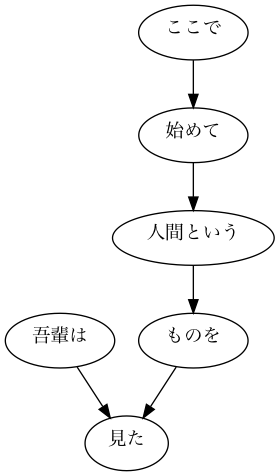

In [10]:
import pydot
from IPython.display import Image

# 係り受け木のDOT言語への変換

dotex = ""

head = """
digraph dep_tree{
 // edge define
"""
foot = "\n}"
dotex += head

sentences = make_chunklist('./work/neko.txt.cabocha')
for i, sentence in enumerate(sentences, start=1):
    if i == 6:
        for j, chunk in enumerate(sentence):
            for src in chunk.srcs:
                child = sentence[src].concat_surface()
                parent = chunk.concat_surface()
                # 記号だけからなる文節について空文字列になることへの対処
                if len(child) > 0 and len(parent) > 0:
                    dotex += '''\n {n1} [label = "{parent}"];
                    \n {n2} [label = "{child}"];
                    \n {n2} -> {n1};'''.format(n1=j, n2=src, parent=parent, child=child)
                
dotex += foot
                
trees = pydot.graph_from_dot_data(dotex)

for tree in trees:
    tree.write_png('./work/dep_tree.png')
    
Image('./work/dep_tree.png')

# 45. 動詞の格パターンの抽出

今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 
動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ．

- 係り元の1文節中に2つ以上助詞がある場合をカウントしてしまっているからちょっと多い? -> 格助詞以外が消えたことでまとまったものがありそう

In [20]:
sentences = make_chunklist('./work/neko.txt.cabocha')
surf_case = ('が', 'を', 'に', 'から', 'へ', 'と', 'より', 'まで', 'で') # 日本語の表層格を定義

with open('./work/case_ptn.txt', 'w') as out:
    for sentence in sentences:
        for chunk in sentence:
            # 各文節に対する述語のリスト
            pred = chunk.get_pred()
            if len(pred) > 0:
                # 各述語にかかる助詞のリスト
                case = sorted(morph.base for src in chunk.srcs for morph in sentence[src].morphs \
                        if morph.pos == '助詞' and morph.base in set(surf_case))
                if len(case) > 0:
                    print(pred[0] + '\t' + ' '.join(case), file=out) # 文節中の最左の動詞を述語とする

In [21]:
!cat ./work/case_ptn.txt 2>/dev/null | head

生れる	で
つく	が
泣く	で
始める	で
見る	を
聞く	で
捕える	を
思う	から
載せる	に
持ち上げる	と


# 46. 動詞の格フレーム情報の抽出

45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．

- ** 助詞並べ替え実現しました ** (統合失調症)

- operator.itemgetter(idx) = lambda x: x[idx]
- f = attrgetter('name') -> f(b) -> b.nameを呼ぶ

In [5]:
from collections import OrderedDict

sentences = make_chunklist('./work/neko.txt.cabocha')
surf_case = ('が', 'を', 'に', 'から', 'へ', 'と', 'より', 'まで', 'で') # 日本語の表層格を定義

with open('./work/case_frame.txt', 'w') as out:
    for sentence in sentences:
        for chunk in sentence:
            # 各文節に対する述語のリスト
            pred = chunk.get_pred()
            if len(pred) > 0:
                case = {}
                for src in chunk.srcs:
                    for morph in sentence[src].morphs:
                        if morph.pos == '助詞' and morph.base in surf_case:
                            case[morph.base] = sentence[src].concat_surface()
                            
                od_case = OrderedDict(sorted(case.items(), key=lambda x: x[0]))
                if len(od_case) > 0:
                    print(pred[0] + '\t' + ' '.join(od_case.keys()) + '\t' + ' '.join(od_case.values()), file=out)

In [6]:
!cat ./work/case_frame.txt 2>/dev/null | head

生れる	で	どこで
つく	が	見当が
泣く	で	所で
始める	で	ここで
見る	を	ものを
聞く	で	あとで
捕える	を	我々を
思う	から	なかったから
載せる	に	掌に
持ち上げる	と	スーと


# 47. 機能動詞構文のマイニング

動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

- 同じ助詞が係り元にあるときdictの同一keyに値がsetされてしまう -> tupleのlistで持つ方がいいかもしれない

In [15]:
from collections import OrderedDict # dict型を維持したままsortしたい -> というか通常の辞書型は順番を保持しない
from cytoolz import sliding_window

sentences = make_chunklist('./work/neko.txt.cabocha')

with open('./work/funct_verb.txt', 'w') as out:
    for sentence in sentences:
        for chunk in sentence:
            # 各文節に対する述語(動詞)のリスト
            pred = chunk.get_pred()
            if len(pred) > 0:
                # 動詞が含まれる文節に対して
                case_dict = {}
                p_sa = []
                
                for src in chunk.srcs:
                    # 係り元の文節に対して形態素の2つ組を作る
                    for m1, m2 in sliding_window(2, (morph for morph in sentence[src].morphs)):
                        if m1.pos1 == 'サ変接続' and m2.pos == '助詞' and m2.surface == 'を':
                            p_sa.append(m1.surface + m2.surface + pred[0]) # 最左の動詞
                        elif m2.pos == '助詞':
                            # 暗黙に助詞から始まるchunkはない&助詞は単体で文節にならないと仮定している
                            case_dict[m2.surface] = sentence[src].concat_surface()
                
                # 辞書順にソート
                od = OrderedDict(sorted(case_dict.items(), key=lambda x: x[0]))
                
                if len(p_sa) > 0 and len(case_dict) > 0:
                    # サ変接続名詞が入っている動詞
                    for p in p_sa:
                        print(p + '\t' + ' '.join(od.keys()) + '\t' + ' '.join(od.values()), file=out)

- dictにsortedをかけるとkeyのみがsortされる
- dict.items()にsortすればいい -> タプルになるから出力の時にunpackingとかiterationが面倒

In [16]:
!cat ./work/funct_verb.txt 2>/dev/null | head

決心をする	と	こうと
返報をする	んで	偸んで
昼寝をする	が	彼が
迫害を加える	て	追い廻して
生活をする	が を	我等猫族が 愛を
投書をする	て へ	やって ほととぎすへ
話をする	に	時に
昼寝をする	て	出て
欠伸をする	から て	なったから 押し出して
報道をする	に	耳に


- cytoolzのsliding_windowの方が速い?? -> 若干

In [13]:
import time
import toolz.itertoolz
import cytoolz

def test_itertoolz():
    x = toolz.itertoolz.sliding_window(2, range(int(1.e8)))
    
def test_cytoolz():
    x = cytoolz.sliding_window(2, range(int(1.e8)))
    
start = time.time()
test_itertoolz()
end = time.time()
print(end - start)

start = time.time()
test_cytoolz()
end = time.time()
print(end - start)

9.608268737792969e-05
5.698204040527344e-05


- コーパス中に頻出する述語

In [17]:
!cut -f1 ./work/funct_verb.txt | sort | uniq -c | sort -r 2>/dev/null | head

     26 返事をする
     19 挨拶をする
     12 話をする
      8 質問をする
      7 喧嘩をする
      6 真似をする
      5 質問をかける
      5 相談をする
      5 注意をする
      5 昼寝をする


- コーパス中で頻出する述語と助詞パターン

In [18]:
!cut -f 1,2 ./work/funct_verb.txt | sort | uniq -c | sort -r 2>/dev/null | head

      4 挨拶をする	から
      4 返事をする	と は
      4 返事をする	と
      3 挨拶をする	と
      3 喧嘩をする	と
      2 同情を表する	て と は
      2 質問をかける	と は
      2 活躍を試みる	て
      2 休養を要する	は
      2 返事をする	から と


# 48. 名詞から根へのパスの抽出

- ~~外部ファイルに書き込みたかったからget_path内のprintをreturnにして、変数=get_path(sentence,chunk) -> print(変数)って書くとreturnの直前まではちゃんとtype=strなのになぜかNoneが帰ってくる**意味不明。**~~ -> 解決しました thanks to 清野さん

文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．
各文節は（表層形の）形態素列で表現する
パスの開始文節から終了文節に至るまで，各文節の表現を"->"で連結する

- @lru_cache(maxsize=int)でメモ化ができる (再帰の時に前と同じ結果を利用するためにキャッシュ)

In [15]:
sentences = make_chunklist('./work/neko.txt.cabocha')

def get_path(sentence, chunk, path):
    
    path.append(chunk.concat_surface())
    
    if chunk.dst == -1:
        return ' -> '.join(path)
    else:
        return get_path(sentence, sentence[chunk.dst], path) 

for i, sentence in enumerate(sentences, start=1):
    if i == 6:
        for chunk in sentence:
            if chunk.contain_pos('名詞'):
                print(get_path(sentence, chunk, path=list()))
        break

吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た


- 取り消し線で書いた苦戦

In [16]:
sentences = make_chunklist('./work/neko.txt.cabocha')

def get_path(sentence, chunk, path):
    
    path.append(chunk.concat_surface())
    
    if chunk.dst == -1:
        print(' -> '.join(path))
    else:
        get_path(sentence, sentence[chunk.dst], path)     

for i, sentence in enumerate(sentences, start = 1):
    if i == 6:
        for chunk in sentence:
            if chunk.contain_pos('名詞'):
                get_path(sentence, chunk, path = list())
        break

吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た


In [17]:
sentences = make_chunklist('./work/neko.txt.cabocha')

def get_path(sentence, chunk, path):
    
    path.append(chunk.concat_surface())
    
    if chunk.dst == -1:
        x = ' -> '.join(path)
        return x
    else:
        x = get_path(sentence, sentence[chunk.dst], path) # 一回でもelseたどった場合結果はこのxに入っている    
    return x # 要するにelseに分岐したときに最後にifに入ってreturnしてもそれが呼び出し元に戻っていなかった

for i, sentence in enumerate(sentences, start = 1):
    if i == 6:
        for chunk in sentence:
            if chunk.contain_pos('名詞'):
                print(get_path(sentence, chunk, path = list()))
        break

吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た


- よく考えたら再帰でfactorial計算するときもelseブロックの中returnしてるのになぜ気づかんかった...

# 49. 名詞間の係り受けパスの抽出

文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．
ただし，名詞句ペアの文節番号が$i$と$j$（$i < j$）のとき，係り受けパスは以下の仕様を満たすものとする．

問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を"->"で連結して表現する
文節$i$と$j$に含まれる名詞句はそれぞれ，XとYに置換する
また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節$i$から構文木の根に至る経路上に文節$j$が存在する場合: 文節$i$から文節$j$のパスを表示
- 上記以外で，文節$i$と文節$j$から構文木の根に至る経路上で共通の文節$k$で交わる場合: 文節$i$から文節$k$に至る直前のパスと文節$j$から文節$k$に至る直前までのパス，文節$k$の内容を"|"で連結して表示

In [10]:
import itertools

sentences = make_chunklist('./work/neko.txt.cabocha')

# 48のget_pathをchunkのlistで返すようにしただけ
def get_path_as_list(sentence, chunk, path=None):
    
    # デフォルト引数はimmutableなものにする
    if path == None:
        path = []
    path.append(chunk)
    
    if chunk.dst == -1:
        return path
    else:
        return get_path_as_list(sentence, sentence[chunk.dst], path) 

def get_dep_path(path1, path2):
    
    # 係り受けパスptn1の場合
    # path1の先頭は必ずpath2の先頭より元の文で前にあること、とpath2の先頭が名詞(句)であることは保証されている
    if path2[0] in path1:
        # 構文木の根までに名詞(句)jに遭遇した場合
        for n1, p1 in enumerate(path1):
            
            if p1 == path2[0]:
  
                i_replaced = path1[0].replace_wchar('名詞', 'X')
                j_replaced = path1[n1].replace_wchar('名詞', 'Y')

                print(i_replaced, *(ch.concat_surface() for ch in path1[1:n1]), j_replaced, sep=' -> ')

                break
    
    # 係り受けパスptn2の場合
    else:
        for n1, p1 in enumerate(path1):          
            for n2, p2 in enumerate(path2):
                if p1 == p2:

                    i_replaced = path1[0].replace_wchar('名詞', 'X')
                    j_replaced = path2[0].replace_wchar('名詞', 'Y')

                    print(i_replaced, *(ch.concat_surface() for ch in path1[1:n1]), sep=' -> ', end=' | ')
                    print(j_replaced, *(ch.concat_surface() for ch in path2[1:n2]), sep=' -> ', end=' | ')
                    print(p1.concat_surface())
                    
                    break
                    
            else: continue
                
            break

for i, sentence in enumerate(sentences, start=1):
    if i == 6:
        paths = []
        for chunk in sentence:
            if chunk.contain_pos('名詞'):
                paths.append(get_path_as_list(sentence, chunk)) # ここでpathsの各要素 -> pathに含まれるchunkのリスト
                
        path_comb = itertools.combinations(paths, 2)

        for x, y in path_comb:
            get_dep_path(x, y)
        
        break

Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Yという
Xで -> 始めて -> 人間という -> Yを
Xという -> Yを


### 以下試行錯誤したコードたち

- 旧バージョンのコード(この文うまく出力できてるけどなんか分岐違わね...?)

In [45]:
import itertools

sentences = make_chunklist('./work/neko.txt.cabocha')

# 48のget_pathをchunkのlistで返すようにしただけ
def get_path_as_list(sentence, chunk, path):
    
    path.append(chunk)
    
    if chunk.dst == -1:
        return path
    else:
        return get_path_as_list(sentence, sentence[chunk.dst], path) 

def get_dep_path(sentence, path1, path2):
    
    subj = path1[-1] # 構文木の根
    
    path1 = path1[:-1] # 根を取り除く
    path2 = path2[:-1]
    
    np_included_in_path = False
    
    # 係り受けパスptn1の場合(根までのどこかで交わる)
    # path1の先頭は必ずpath2の先頭より元の文で前にあること、とpath1の先頭が名詞(句)であることは保証されている
    for n1, p1 in enumerate(path1):
        for n2, p2 in enumerate(path2):
            if p1 == p2 and '名詞' in (mp.pos for mp in p1.morphs):
                np_included_in_path = True
                
                i = 0
                j = n1
                i_replaced = path1[i].replace_wchar('名詞', 'X')
                j_replaced = path1[j].replace_wchar('名詞', 'Y')
                
                # 第2引数がない場合(i+1 = j)に->が2個出力される問題...もう少しきれいなsolutionはないものか
                if i + 1 != j:
                    print(i_replaced + ' -> ' + ' -> '.join(ch.concat_surface() for ch in path1[i+1:j]) + ' -> ' + j_replaced)
                else:
                    print(i_replaced + ' -> ' + j_replaced)
    
    # ptn2の場合(構文木の根に名詞が含まれている(「話である」など)と事故る=最後の文節だけからなるpathが抽出されているからpath2の長さに条件をつけた)
    if not np_included_in_path and not len(path2) == 0:
        
        i_replaced = path1[0].replace_wchar('名詞', 'X')
        j_replaced = path2[0].replace_wchar('名詞', 'Y')
        
        # ptn1の場合と同じで矢印の個数合わせをする必要 (ptn2の場合の出力もう少し工夫いりそう)
        if len(path2) > 1:
            print(i_replaced + ' -> '.join(ch.concat_surface() for ch in path1[1:]) + ' | ' + \
                  j_replaced + ' -> ' +  ' -> '.join(ch.concat_surface() for ch in path2[1:]) + ' | ' + subj.concat_surface())
        else:
            print(i_replaced + ' -> '.join(ch.concat_surface() for ch in path1[1:]) + ' | ' + \
                  j_replaced +  ' -> '.join(ch.concat_surface() for ch in path2[1:]) + ' | ' + subj.concat_surface())

for i, sentence in enumerate(sentences, start = 1):
    if i == 6:
        paths = []
        for chunk in sentence:
            if chunk.contain_pos('名詞'):
                paths.append(get_path_as_list(sentence, chunk, path = list())) # ここでpathsの各要素 -> pathに含まれるchunkのリスト
                
        path_comb = itertools.combinations(paths, 2)

        for x, y in path_comb:
            get_dep_path(sentence, x, y)

Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Yという
Xで -> 始めて -> 人間という -> Yを
Xで -> 始めて -> 人間という -> Yを
Xという -> Yを


- 最初やって挫折したコード (なんか問題の意味分かんなくて3時間ぐらいかけたからもったいないし残しとく) -> 関数の仕様が変わったから今実行してもエラー吐く。悲しみ。

In [5]:
import itertools
from copy import deepcopy as dc

sentences = make_chunklist('./work/neko.txt.cabocha')

# 48のget_pathをchunkのlistで返すようにしただけ
def get_path_as_list(sentence, chunk, path):
    
    path.append(chunk)
    
    if chunk.dst == -1:
        return path
    else:
        return get_path_as_list(sentence, sentence[chunk.dst], path) 

def get_dep_path(path, sentence):
    
    dep_path = [] # 名詞句の係り受けパス
    
    # itertools.combinations(iter, r)はiterを受け取ってr要素からなるその部分列の組み合わせを順番を保持したまま返す
    # ex.) list(itertools.combinations(range(3), 2)) = [(0,1), (0,2), (1,2)]
        
    # これは48のパスから考えられるchunkの2つ組でともに名詞を含むときのchunkのindexを返す
    np_idx = ((c1.idx, c2.idx) for c1, c2 in itertools.combinations(path, 2) \
    if c1.contain_pos('名詞') and c2.contain_pos('名詞'))
        
    # 係り受けパス ptn1
    if np_idx:
        for i, j in np_idx:
                
            # 元のsentenceはいじりたくない
            sent_copied = dc(sentence)
            # sent_copied[i].replace_wchar('名詞', 'X')
            # sent_copied[j].replace_wchar('名詞', 'Y', del_particles = True) あとから関数変わったからこれでは動かない
                
            dep_path.append(' -> '.join(ch.concat_surface() for ch in sent_copied[i:j+1]))
                
    return dep_path        

for i, sentence in enumerate(sentences, start = 1):
    if i == 6:
        paths = []
        for chunk in sentence:
            if chunk.contain_pos('名詞'):
                paths.append(get_path_as_list(sentence, chunk, path = list()))
        for path in paths:
            dep_path = get_dep_path(path, sentence)
            for d in dep_path:
                print(d)

AttributeError: 'Chunk' object has no attribute 'idx'